Chapter 23
# 重心坐标系中混合红绿蓝
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.tri as tri

In [16]:
# 等边三角形
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]]).T
triangle = tri.Triangulation(corners[0,:], corners[1,:])
refiner = tri.UniformTriRefiner(triangle)

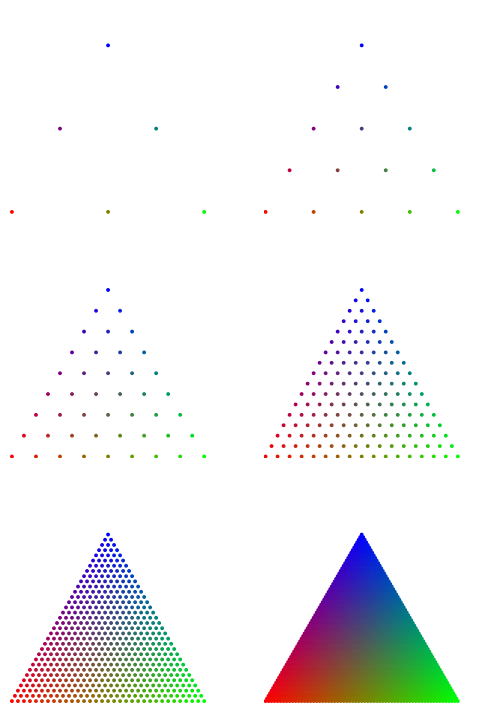

In [25]:
fig, axs = plt.subplots(3,2,figsize=(6,9))

for subdiv,ax in zip(range(1,7), axs.ravel()):

    trimesh_2 = refiner.refine_triangulation(subdiv=subdiv)
    r_array = np.row_stack((trimesh_2.x,trimesh_2.y))

    r1 = corners[:,[0]]
    r2 = corners[:,[1]]
    r3 = corners[:,[2]]

    T = np.column_stack((r1 - r3,r2 - r3))

    theta_1_2 = np.linalg.inv(T) @ (r_array - r3)
    theta_3 = 1 - theta_1_2[0,:] - theta_1_2[1,:]
    theta_1_2_3 = np.row_stack((theta_1_2,theta_3))
    theta_1_2_3 = np.clip(theta_1_2_3, 1e-6, 1.0 - 1e-6)

    ax.scatter(r_array[0,:],r_array[1,:], c=theta_1_2_3.T, s=3)
    ax.set_aspect('equal')
    ax.set_xlim(-0.01,1.05); ax.set_ylim(-0.01,1.05)
    ax.axis('off')
# fig.savefig('RGB.svg')